**<h1 style="text-align: center;">Food Chain Equilibrium and Invasive Specie Disruption</h1>**


## **Introduction:**

The provided code implements the Lotka-Volterra model, a classic predator-prey system, using the Runge-Kutta 4th order (RK4) numerical method.
We will use it to simulate the disruptive effect of an invasive species on a food chain.

## **1. Lotka-Volterra Equations:**
The model consists of two coupled nonlinear differential equations describing the interaction between prey x(t) and predators y(t):
 
  
### $\frac{dx}{dt}$ = αx − βxy   &nbsp;&nbsp;&nbsp;     (Prey dynamics),


### $\frac{dy}{dt}$ = δxy − γy   &nbsp;&nbsp;&nbsp;     (Predator dynamics),
​

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Model Parameters:**

*   ### **α** : Prey growth rate.

*   ### **β** : Predation rate reducing prey.

*   ### **γ** : Predator death rate.

* ### **δ** : Predator growth efficiency.    

In [2]:
# Lotka-Volterra Model Parameters
alpha = 1.1
beta = 0.4
gamma = 0.4
delta = 0.1

## **3. Defining the time parameters:**
* #### **dt :** Sets the time step size for the numerical integration, Smaller dt improves accuracy but increases computation time.

* #### **N :** Defines the total number of time steps for the simulation, enough steps to capture multiple predator-prey cycles

* #### **t :** Creates a time array for plotting and analysis.

In [3]:
# Sample Time
dt = 0.01

# Simulation Time
N = 5000
t = np.arange(N)*dt

 #### We initially start with a prey population "**x0**" of **20** and a predator population "**y0**" of **5**

In [4]:
# Initial Values 
x0 = 20
y0 = 5

#### The function **f(x, y)**  computes the time derivatives of the prey **(x)** and predator **(y)** populations at a given state **(x, y)**. 
$\frac{dx}{dt}$ = αx − βxy

$\frac{dy}{dt}$ = δxy − γy

In [5]:
# Dynamics of The Model
def f(x, y):
    xdot = alpha*x - beta*x*y
    ydot = delta*x*y - gamma*y
    return xdot, ydot


### **4. Numerical Integration (RK4 Method):**
The code uses the ( Runge–Kutta) **RK4 method** to solve the system numerically. For a time step  \( Δt \) , the update rule for \( x \) and \( y \) is:


\begin{aligned}
k_1^x &= f(x, y), \quad k_1^y = g(x, y), \\
k_2^x &= f\left(x + \frac{k_1^x \Delta t}{2}, y + \frac{k_1^y \Delta t}{2}\right), \quad k_2^y = g\left(x + \frac{k_1^x \Delta t}{2}, y + \frac{k_1^y \Delta t}{2}\right), \\
k_3^x &= f\left(x + \frac{k_2^x \Delta t}{2}, y + \frac{k_2^y \Delta t}{2}\right), \quad k_3^y = g\left(x + \frac{k_2^x \Delta t}{2}, y + \frac{k_2^y \Delta t}{2}\right), \\
k_4^x &= f(x + k_3^x \Delta t, y + k_3^y \Delta t), \quad k_4^y = g(x + k_3^x \Delta t, y + k_3^y \Delta t), \\
x_{n+1} &= x_n + \frac{\Delta t}{6}(k_1^x + 2k_2^x + 2k_3^x + k_4^x), \\
y_{n+1} &= y_n + \frac{\Delta t}{6}(k_1^y + 2k_2^y + 2k_3^y + k_4^y).
\end{aligned}


Here, \( f(x, y) =  αx -  βxy \) and \( g(x, y) = δ x y -  γy \). RK4 provides higher accuracy than Euler’s method, crucial for capturing oscillatory behavior

In [6]:
def next(x, y):
    xdot1, ydot1 = f(x, y)
    xdot2, ydot2 = f(x + xdot1*dt/2, y + ydot1*dt/2)
    xdot3, ydot3 = f(x + xdot2*dt/2, y + ydot2*dt/2)
    xdot4, ydot4 = f(x + xdot3*dt, y + ydot3*dt)
    xnew = x + (xdot1 + 2*xdot2 + 2*xdot3 + xdot4)*dt/6
    ynew = y + (ydot1 + 2*ydot2 + 2*ydot3 + ydot4)*dt/6
    return xnew, ynew

***Why use Runge-Kutta method ?***

We used RK4 here because it's simple to implement, accurate, and robust for simulating systems like predator-prey dynamics over time. This method is known for it's stability and ability handle the non linearities.

***Why use preciscely the 4th order ?***

The local truncation error is 𝑂(𝑑𝑡5) and global error is 𝑂(𝑑𝑡4), meaning it's quite precise even for relatively large time steps.
We are greatly reducing the error by approximating the solution using four slopes 



##  **5. Simulation:**
We now can iterate through the time steps and apply the RK4 method to get our plot points

In [7]:
# Simulation Loop
x = np.zeros(N) #creating an array to store our data points 
y = np.zeros(N)
x[0] = x0  # Set initial prey population
y[0] = y0  # Set initial predator population
for i in range(N-1):
    x[i+1], y[i+1] = next(x[i], y[i])
    #updating the population by looping over the time

## **6. Plotting:**
we can now visualize the interaction 

Text(0.5, 1.0, 'Phase Portrait')

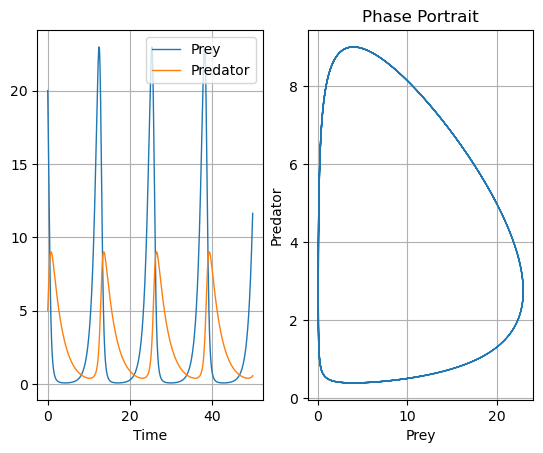

In [8]:
plt.subplot(1,2,1)
plt.plot(t,x, label='Prey', linewidth=1)
plt.plot(t,y, label='Predator', linewidth=1)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('Time')

plt.subplot(1,2,2)
plt.plot(x,y, linewidth=1)
plt.grid()
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.title('Phase Portrait')

we observe that the predator population (orange) spikes after a small time delay from the spike of the prey poulation (blue) this is because predators thrive when there is an abundence of prey and the prey population decrease when there is a lot of predators.

The phase portrait shows a circular pattern because this prey predator cycle continue indefinetly 

## **7. Adding damping to reach equilibrium:** ##

in the f function we introduce a new parameter k initially 25 it represents the  carrying capacity of the environment (max sustainable prey population).
This helps us represent an ecosystem with finite resourses like vegetaion ,food , water, habita...ec that can only sustain a limited number of animals makin the food chain more realistic.

\[
\begin{aligned}
\frac{dx}{dt} &= \alpha x \left(1 - \frac{x}{K} \right) - \beta x y \\
\frac{dy}{dt} &= \delta x y - \gamma y
\end{aligned}
\]




In [9]:
K = 25
# Modified dynamics with damping
def f(x, y):
    xdot = alpha * x * (1 - x / K) - beta * x * y
    ydot = delta * x * y - gamma * y
    return xdot, ydot

In [10]:
#reinitialising parameters
dt = 0.01
N = 5000
t = np.arange(N)*dt
x0 = 20
y0 = 5

Text(0.5, 1.0, 'Phase Portrait')

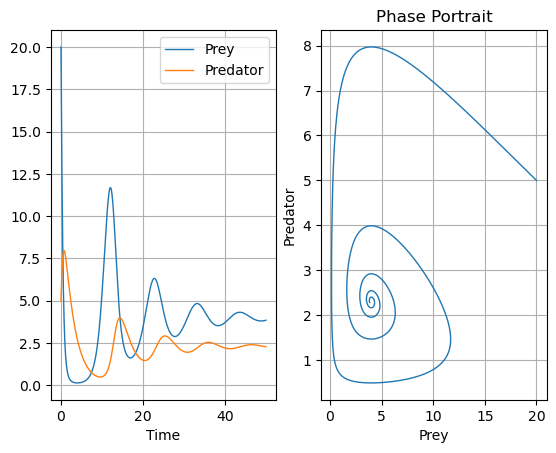

In [11]:
# new plot
x = np.zeros(N) 
y = np.zeros(N)
x[0] = x0  
y[0] = y0 
for i in range(N-1):
    x[i+1], y[i+1] = next(x[i], y[i])
    plt.subplot(1,2,1)
plt.plot(t,x, label='Prey', linewidth=1)
plt.plot(t,y, label='Predator', linewidth=1)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('Time')

plt.subplot(1,2,2)
plt.plot(x,y, linewidth=1)
plt.grid()
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.title('Phase Portrait')

## **8.New Observations:** ##

* Prey growth is limited by resources or space (like a carrying capacity).

* Similarly to the first plot when the prey populationn spikes the predator population also spikes after a time delay but the ocillations of both plots is getting smaller until they reach near constant values, that's the food chain equilibrium.

* The phase portait is now a spiral because the oscillation is damped, the trajectory should move inward until it converges into a single point.

* **K** is a limited ecological constrain that the prey population depends on it to grow making the simulation more realistic

## **9.Introducing an Invasive Specie to the equilibrium:** ##

###  Predator-Prey-Invasive Species Model

Let:
- `x(t)` = Native prey population  
- `y(t)` = Predator population  
- `z(t)` = Invasive species population  
- `K` = Carrying capacity (shared by both prey species)  

---

#### Differential Equations:

\[
\begin{align*}
\frac{dx}{dt} &= \alpha x \left(1 - \frac{x + z}{K} \right) - \beta x y \\
\frac{dy}{dt} &= \delta x y - \gamma y \\
\frac{dz}{dt} &= \epsilon z \left(1 - \frac{x + z}{K} \right)
\end{align*}
\]

---

**Where:**

- **α** : growth rate of native prey  
- **β** : rate at which predators consume native prey  
- **γ** : natural death rate of predators  
- **Δ** : efficiency of predator growth from consuming prey  
- **ε**: growth rate of invasive species (usually > α)  
-  **K** : environmental carrying capacity (limits prey + invasive growth)



#### **modifying f and the mk4 method to include the invasive specie** ####

In [12]:
# New parameter
epsilon = 1.5  # Growth rate of invasive species
k = 25
# Updated dynamics
def f(x, y, z):
    total_prey = x + z  # Total biomass competing for resources
    xdot = alpha * x * (1 - total_prey / K) - beta * x * y
    ydot = delta * x * y - gamma * y
    zdot = epsilon * z * (1 - total_prey / K)  # Unchecked growth
    return xdot, ydot, zdot
def next(x, y, z):
    dx1, dy1, dz1 = f(x, y, z)
    dx2, dy2, dz2 = f(x + dx1*dt/2, y + dy1*dt/2, z + dz1*dt/2)
    dx3, dy3, dz3 = f(x + dx2*dt/2, y + dy2*dt/2, z + dz2*dt/2)
    dx4, dy4, dz4 = f(x + dx3*dt, y + dy3*dt, z + dz3*dt)
    
    xnew = x + (dx1 + 2*dx2 + 2*dx3 + dx4) * dt / 6
    ynew = y + (dy1 + 2*dy2 + 2*dy3 + dy4) * dt / 6
    znew = z + (dz1 + 2*dz2 + 2*dz3 + dz4) * dt / 6
    
    return xnew, ynew, znew

In [ ]:
#reinitialising parameters
dt = 0.01
N = 5000
t = np.arange(N)*dt
x0 = 200
y0 = 50
z0 = 2
k = 25

Text(0.5, 1.0, 'Phase Portrait')

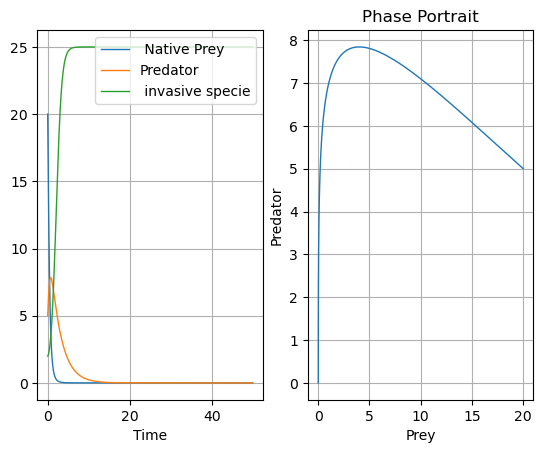

In [14]:
# new plot
x = np.zeros(N) 
y = np.zeros(N)
z = np.zeros(N)

x[0] = x0
y[0] = y0
z[0] = z0
for i in range(N-1):
    x[i+1], y[i+1] , z[i+1] = next(x[i], y[i], z[i])
plt.subplot(1,2,1)
plt.plot(t,x, label=' Native Prey', linewidth=1)
plt.plot(t,y, label='Predator', linewidth=1)
plt.plot(t,z, label=' invasive specie', linewidth=1)
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('Time')

plt.subplot(1,2,2)
plt.plot(x,y, linewidth=1)
plt.grid()
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.title('Phase Portrait')

## **10.Observations**

* the **invasive species** directly competed with the **prey** for the limited resources (**K**) causing a shortage, this shortage is responsible for the decline in the **prey** population. Which in turn caused the decline in **predator** population.
the decline continued until we observe the extinction of the **prey** and shortly after the extinction **predator** population.

* the phase portrait shows a decending slope representing the swift decline of both populations until their extinction.


* the population of the **invasive species** initially 2 swifty increase (boom) since it doesn't have a predator,rapidly replacing the **prey** population until their extinction.


* after the extinction of the **prey** the **invasive species** population stabilises at 25 as their growth is limited by the resourses available that allows only 25 individuals to survive at a time.

---

### 📌 Author & Credits  
👤 **Author:** Fares Ayadi  

📅 **Last Updated:** 2025-04-15  

🔗 **References:** [https://github.com/smkalami/lotka-volterra-in-python.git](#) 

📜 **License:** [MIT License](https://opensource.org/licenses/MIT)  

This work is licensed under the MIT License, which allows you to use, modify, and distribute the code with attribution.
 

---

<div style="text-align: center; font-size: 0.9em; color: gray;">
© 2025 Fares Ayadi 
</div>
